In [29]:
# https://cvisiondemy.com/lisense-plate-detection-with-opencv-and-python/
import cv2
import numpy as np
import matplotlib.pyplot as plt

width: 2072 pixels
height: 1072 pixels
channels: 3


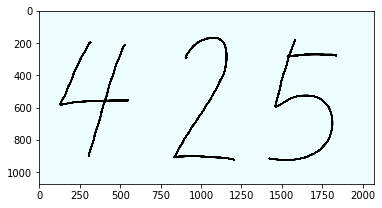

In [30]:
frame = 'digits_425.jpg'

img = cv2.imread(frame) # read image
#plt.figure(figsize=(10,10))
plt.imshow(img);
print("width: {} pixels".format(img.shape[1]))
print("height: {} pixels".format(img.shape[0]))
print("channels: {}".format(img.shape[2]))

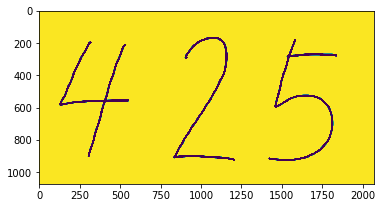

In [31]:
# hsv transform - value = gray image

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) # hsv = hue(색), saturation(채도), value(명도)
hue, saturation, value = cv2.split(hsv)
plt.imshow(value)

In [32]:
# kernel to use for morphological operations
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))

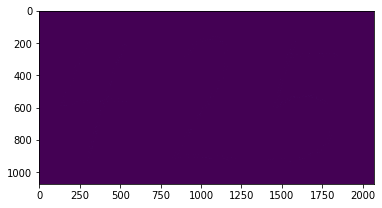

In [33]:
# applying topHat operations
topHat = cv2.morphologyEx(value, cv2.MORPH_TOPHAT, kernel)
plt.imshow(topHat)

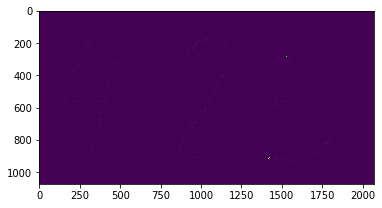

In [34]:
# applying blackHat operations
blackHat = cv2.morphologyEx(value, cv2.MORPH_BLACKHAT, kernel)
plt.imshow(blackHat)

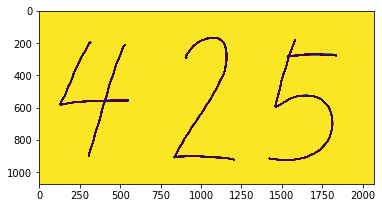

In [35]:
# add and subtract between morphological operations
add = cv2.add(value, topHat)
subtract = cv2.subtract(add, blackHat)
plt.imshow(subtract)

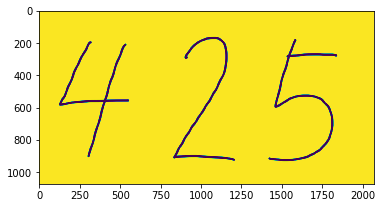

In [36]:
# applying gaussian blur on subtract image
blur = cv2.GaussianBlur(subtract, (5,5), 0)
plt.imshow(blur)

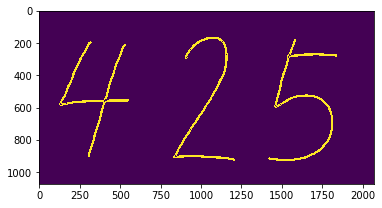

In [37]:
# thresholding
thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 19, 9)
plt.imshow(thresh)

In [38]:
cv2MajorVersion = cv2.__version__.split(".")[0]
print('openCV version: ', cv2MajorVersion)

# check for contours on thresh
if int(cv2MajorVersion) >= 4:
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
else:
    imageContours, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

openCV version:  4


836 856 890 908
1461 1478 579 597
129 147 567 584
394 424 544 574
905 914 278 295
1537 1563 268 301
123 558 193 907
1419 1845 178 932
829 1213 166 930


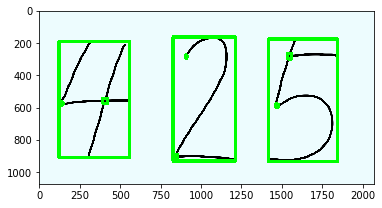

In [39]:
img_digits = []
img_origin = img.copy()
margin = 10

# loop to check if any (possible) contour is found
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    # ignore if image is too small
    if w*h < 100: continue
    # y and x (y-margin: y+h+margin, x-mar gin: x+w+margin)
    img_digits.append(img_origin[y-margin:y+h+margin, x-margin:x+h+margin])
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 20)
    print(x, x+w, y, y+h)
plt.imshow(img)

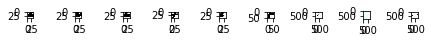

In [40]:
for i in range(0, len(img_digits)):
    plt.subplot(1, len(img_digits), i+1)
    plt.imshow(img_digits[i], cmap='Greys', interpolation='nearest')
plt.tight_layout()
plt.show()

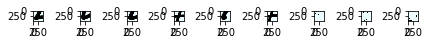

In [47]:
SZ = 500

for i in range(0, len(img_digits)):
    plt.subplot(1, len(img_digits), i+1)
    plt.imshow(cv2.resize(img_digits[i], (SZ, SZ)), cmap='Greys', interpolation='nearest')
plt.tight_layout()
plt.show()

In [48]:
import tensorflow as tf

model = tf.keras.models.load_model('digits_model.h5')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


ValueError: in user code:

    /Users/hyunjigonji/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1147 predict_function  *
        outputs = self.distribute_strategy.run(
    /Users/hyunjigonji/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/hyunjigonji/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/hyunjigonji/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/hyunjigonji/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1122 predict_step  **
        return self(x, training=False)
    /Users/hyunjigonji/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:927 __call__
        outputs = call_fn(cast_inputs, *args, **kwargs)
    /Users/hyunjigonji/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:277 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    /Users/hyunjigonji/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/network.py:719 call
        convert_kwargs_to_constants=base_layer_utils.call_context().saving)
    /Users/hyunjigonji/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/network.py:888 _run_internal_graph
        output_tensors = layer(computed_tensors, **kwargs)
    /Users/hyunjigonji/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:886 __call__
        self.name)
    /Users/hyunjigonji/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/input_spec.py:216 assert_input_compatibility
        ' but received input with shape ' + str(shape))

    ValueError: Input 0 of layer dense_2 is incompatible with the layer: expected axis -1 of input shape to have value 784 but received input with shape [None, 2500]


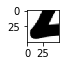

In [50]:
for i in range(0, len(img_digits)):
    plt.subplot(1, len(img_digits), i+1)
    num = cv2.resize(img_digits[i], (SZ,SZ))[:,:,1]
    num = 255 - num # reverse
    num = num.astype('float32') / 255.
    plt.imshow(num, cmap='Greys', interpolation='nearest')
    result = model.predict(np.array([num]))
    result_number = np.argmax(result)
    plt.title(result_number)
    performance = [ val for val in result[0] ]
    print(performance)
plt.tight_layout()
plt.show()